In [0]:
##Using VGG16 to extract features

In [0]:
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

In [0]:
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D


from tensorflow.keras.optimizers import SGD, Adam

from tensorflow.keras.layers import Dropout, BatchNormalization

In [0]:
name_list = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] ## dataset category

In [0]:
(X_train, Y_train_x), (X_test, Y_test_x) = datasets.cifar10.load_data() ## load dataset

X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

170500096/170498071 [==============================] - 6s 0us/step


In [0]:
X_train[0].shape

(32, 32, 3)

In [0]:
Y_train_x[0]

array([6], dtype=uint8)

In [0]:
Y_train_x[0].squeeze() ## remove dim = 1

array(6, dtype=uint8)

In [0]:
Y_train = to_categorical(Y_train_x, 10)
Y_test = to_categorical(Y_test_x, 10)

In [0]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

(-0.5, 31.5, 31.5, -0.5)

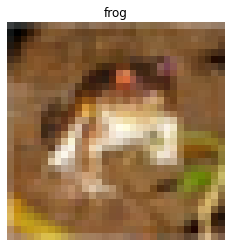

In [0]:
plt.imshow(X_train[0])
plt.title(name_list[Y_train_x[0].squeeze()])
plt.axis("off")

In [0]:
## VGG16
VGG_model = VGG16(include_top=False, input_shape=(32, 32, 3)) ## include_top = False remove classifier part of the network

58892288/58889256 [==============================] - 0s 0us/step


In [0]:
VGG_model.layers ##take a look

In [0]:
VGG_model.layers.pop(-1) ##remove maxpolling, instead, using GlobalAveragePooling

In [0]:
## Our network

GlobalAverage = [GlobalAveragePooling2D()]

FC_layers = [Dense(units=128, activation='relu'),
             Dense(units=64, activation='relu'),
             BatchNormalization(),
             Dense(units=10, activation='softmax')]


In [0]:
## freeze VGG weights
for layers in VGG_model.layers:
  layers.trainable = False

In [0]:
Our_model = Sequential(VGG_model.layers + GlobalAverage + FC_layers)

In [0]:
Our_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 8, 8, 256)         2

In [0]:
Our_model.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['categorical_accuracy'])

In [0]:
Our_model.fit( X_train, Y_train, batch_size=256, epochs=16, validation_data=(X_test, Y_test) )

Epoch 1/16
196/196 [==============================] - 5s 27ms/step - loss: 1.4347 - categorical_accuracy: 0.5043 - val_loss: 1.4268 - val_categorical_accuracy: 0.5041
Epoch 2/16
196/196 [==============================] - 5s 24ms/step - loss: 1.1937 - categorical_accuracy: 0.5853 - val_loss: 1.2372 - val_categorical_accuracy: 0.5716
Epoch 3/16
196/196 [==============================] - 5s 24ms/step - loss: 1.1343 - categorical_accuracy: 0.6046 - val_loss: 1.1950 - val_categorical_accuracy: 0.5819
Epoch 4/16
196/196 [==============================] - 5s 24ms/step - loss: 1.0995 - categorical_accuracy: 0.6179 - val_loss: 1.1689 - val_categorical_accuracy: 0.5920
Epoch 5/16
196/196 [==============================] - 5s 24ms/step - loss: 1.0696 - categorical_accuracy: 0.6282 - val_loss: 1.1740 - val_categorical_accuracy: 0.5944
Epoch 6/16
196/196 [==============================] - 5s 24ms/step - loss: 1.0448 - categorical_accuracy: 0.6358 - val_loss: 1.2426 - val_categorical_accuracy: 0.572

In [0]:
## seems maybe VGG16(freeze) + our model is not that appropriate for cifar10, 
## https://stackoverflow.com/questions/57935576/is-it-normal-that-transfer-learning-vgg16-performs-worse-on-cifar-10
## TO DO : Fine-tune the model


In [0]:
## fine-tune VGG weights
for layers in VGG_model.layers:
  layers.trainable = True

In [0]:
Our_model_tune = Sequential(VGG_model.layers + GlobalAverage + FC_layers)

In [0]:
Our_model_tune.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 8, 8, 256)        

In [0]:
Our_model_tune.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['categorical_accuracy'])

In [0]:
Our_model_tune.fit( X_train, Y_train, batch_size=256, epochs=16, validation_data=(X_test, Y_test) )

Epoch 1/16
196/196 [==============================] - 12s 61ms/step - loss: 2.1159 - categorical_accuracy: 0.1994 - val_loss: 6.0142 - val_categorical_accuracy: 0.1000
Epoch 2/16
196/196 [==============================] - 12s 59ms/step - loss: 1.6363 - categorical_accuracy: 0.3716 - val_loss: 2.4109 - val_categorical_accuracy: 0.1905
Epoch 3/16
196/196 [==============================] - 12s 60ms/step - loss: 1.2841 - categorical_accuracy: 0.5180 - val_loss: 1.8106 - val_categorical_accuracy: 0.3250
Epoch 4/16
196/196 [==============================] - 12s 60ms/step - loss: 1.3592 - categorical_accuracy: 0.4795 - val_loss: 7.7896 - val_categorical_accuracy: 0.1000
Epoch 5/16
196/196 [==============================] - 12s 60ms/step - loss: 1.2315 - categorical_accuracy: 0.5230 - val_loss: 9.9365 - val_categorical_accuracy: 0.1000
Epoch 6/16
196/196 [==============================] - 12s 60ms/step - loss: 1.0580 - categorical_accuracy: 0.6109 - val_loss: 6.8128 - val_categorical_accuracy:

In [0]:
## work so much well than frozen the VGG weights.
## a pre-trained weight with fine tuning is appropriate for cifar10.

In [0]:
##save